In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 150
EPOCHS = 3

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-10T15:39:03.796Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-10T15:39:03.797Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-10T15:39:03.797Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-10T15:39:03.798Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-10T15:39:04.165Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-10T15:39:04.166Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-10T15:39:04.167Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-10T15:39:04.168Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-10T15:40:40.492Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-10T15:40:40.494Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-10T15:40:40.494Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-10T15:40:40.495Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:40:40] "POST /6 HTTP/1.1" 200 -
2021-06-10T15:40:45.261Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-10T15:40:45.263Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-10T15:40:45.264Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-10T15:40:45.265Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-10T15:41:27.158Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-10T15:41:27.160Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-10T15:41:27.161Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-10T15:41:27.161Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T15:41:27.162Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T15:41:27.871Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T15:41:27.872Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T15:41:27.872Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T15:41:27.873

2021-06-10T15:42:52.457Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:42:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:42:52.533Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:42:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:42:52.558Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:42:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:42:52.969Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:85
2021-06-10T15:42:52.970Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T15:42:52.971Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T15:42:52.971Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T15:42:53.041Z | 1.0.5 | IN

2021-06-10T15:43:33.558Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:43:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:43:36.793Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T15:43:36.794Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T15:43:36.794Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T15:43:36.794Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T15:43:36.833Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac085edcc0>
2021-06-10T15:43:36.834Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T15:43:36.835Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T15:44:18.909Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T15:44:18.909Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T15:44:18.945Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac086444e0>
2021-06-10T15:44:18.946Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T15:44:18.946Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T15:44:21.153Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T15:44:21.154Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T15:44:21.155Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T15:45:01.537Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T15:45:01.538Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T15:45:04.007Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T15:45:04.008Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T15:45:04.009Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T15:45:04.010Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T15:45:09.015Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T15:45:14.020Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T15:45:46.749Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T15:45:46.753Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T15:45:46.775Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T15:45:51.782Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T15:45:56.787Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T15:46:01.791Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T15:46:06.795Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T15:46:11.803Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T15:46:15

2021-06-10T15:46:33.871Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T15:46:38.878Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T15:46:43.891Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T15:46:48.903Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T15:46:53.907Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T15:46:58.919Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T15:47:03.923Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T15:47:05.907Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:47:06.202

2021-06-10T15:47:32.130Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T15:47:37.143Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T15:47:42.155Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T15:47:47.162Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T15:47:48.696Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:47:49.339Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:47:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:47:50.528Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:47:51.185Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-10T15:48:29.779Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T15:48:31.458Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:48:31.981Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:48:31] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:48:33.436Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:48:34.030Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:48:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:48:34.476Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:48:34.868Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T15:48:34.873Z | 1.0.5 | INFO | werkzeug                    

2021-06-10T15:49:14.854Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:49:15.350Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:49:15.351Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:49:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:49:15.367Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:49:15.559Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:49:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:49:16.324Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:49:17.799Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T15:49:19.003Z | 1.0.5 | 

2021-06-10T15:50:00.463Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:00.856Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:50:01.711Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:01.831Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:50:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:50:02.407Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:02.410Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:02.476Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:50:02] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:50:02.512Z | 1.0.5 

2021-06-10T15:50:42.138Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:42.475Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:50:42] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:50:43.296Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T15:50:44.459Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:44.467Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:44.509Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:50:44.531Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:50:44.571Z | 1.0.5 | INFO | werkzeug                  

2021-06-10T15:51:27.387Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:51:27.463Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:51:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:51:27.503Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:51:27.577Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:51:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:51:27.815Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:51:27.818Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:51:27.837Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:51:27.842Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T15:52:11.570Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:52:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:52:11.574Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:11.609Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:11.610Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:52:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:52:11.612Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:11.613Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:11.633Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:11.692Z | 1.0.5 | INFO | werkzeug                

2021-06-10T15:52:54.221Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:54.264Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:52:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:52:54.265Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:54.266Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:52:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:52:54.300Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:52:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:52:54.302Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:54.302Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:52:54.303Z | 1.0.5 

2021-06-10T15:53:36.446Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:53:36.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:53:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:53:36.499Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:53:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:53:36.500Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:53:36.501Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:53:36.537Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:53:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:53:36.538Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:53:36.542Z | 1.0.5 

2021-06-10T15:54:18.754Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:54:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:54:18.756Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:54:18.758Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:54:18.759Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:54:18.773Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:54:18.797Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:54:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:54:18.800Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:54:18.836Z | 1.0.5 | INFO | werkzeug                

2021-06-10T15:55:02.396Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:02.431Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:02.432Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:55:02] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:55:02.466Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:02.467Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:55:02] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:55:02.468Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:02.470Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:02.544Z | 1.0.5 | INFO | werkzeug                

2021-06-10T15:55:45.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:45.175Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:45.175Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:55:45.210Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:55:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:55:45.253Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:55:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:55:45.290Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:55:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:55:45.328Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:55:45] "POST /7 HTTP/1.1" 200 -


2021-06-10T15:56:27.733Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T15:56:27.788Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:56:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:56:27.809Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:56:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:56:27.844Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:56:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:56:27.881Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:56:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:56:27.916Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:56:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:56:27.952Z | 1.0.5 | INFO | werkzeug                                         

2021-06-10T15:57:09.942Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:10.019Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:10.021Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:10.070Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:10.092Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:10.128Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:10.166Z | 1.0.5 | INFO | werkzeug        

2021-06-10T15:57:51.994Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:52.031Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:52.098Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:52.099Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:52.136Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:57:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:57:53.320Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T15:57:53.321Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-10T15:58:34.114Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:58:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:58:34.135Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:58:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:58:34.174Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:58:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:58:35.374Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T15:58:35.375Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T15:58:35.375Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T15:58:35.376Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T15:58:35.412Z | 1.0.5 | IN

2021-06-10T15:59:15.944Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 15:59:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T15:59:18.139Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T15:59:18.140Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T15:59:18.140Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T15:59:18.141Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T15:59:18.176Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac10044da0>
2021-06-10T15:59:18.177Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T15:59:18.178Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-10T16:00:01.084Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T16:00:01.084Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:00:01.124Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac085f8160>
2021-06-10T16:00:01.125Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:00:01.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:00:04.238Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:00:04.239Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:00:04.240Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-10T16:00:44.329Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:00:44.329Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:00:46.950Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:00:46.951Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:00:46.953Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:00:46.954Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:00:51.963Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:00:56.967Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10

2021-06-10T16:01:29.452Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:01:29.453Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:01:29.459Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:01:34.463Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:01:39.475Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:01:44.479Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:01:49.487Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:01:54.499Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:01:59

2021-06-10T16:02:16.839Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:02:21.848Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:02:26.851Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:02:31.859Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:02:36.867Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:02:41.879Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:02:46.883Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:02:48.317Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:02:48.561

2021-06-10T16:03:14.051Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:03:19.056Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:03:24.060Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:03:26.961Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:03:27.784Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:03:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:03:29.067Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:03:31.583Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:03:31.673Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-10T16:04:10.115Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:04:11.094Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:04:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:04:11.100Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:04:11.650Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:04:11.808Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:04:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:04:13.095Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:04:13.170Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:04:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:04:13.171Z | 1.0.5 | 

2021-06-10T16:04:51.624Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:04:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:04:52.604Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:04:53.143Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:04:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:04:54.460Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:04:54.598Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:04:54.800Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:04:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:04:56.151Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:04:56.248Z | 1.0.5 | 

2021-06-10T16:05:35.254Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:05:35.992Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:05:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:05:37.823Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:05:38.299Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:05:38.402Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:05:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:05:38.610Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:05:38.697Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:05:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:05:38.863Z | 1.0.5 | 

2021-06-10T16:06:22.836Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:06:22.836Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:06:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:06:22.837Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:06:22.851Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:06:22.873Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:06:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:06:22.874Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:06:22.875Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:06:22.893Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:07:05.607Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:05.607Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:07:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:07:05.681Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:07:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:07:05.682Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:07:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:07:05.684Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:05.697Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:05.721Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:07:05] "POST /7 HTTP/1.1" 200 -


2021-06-10T16:07:47.705Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:47.706Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:47.729Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:47.730Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:47.783Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:07:47.821Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:07:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:07:47.854Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:07:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:07:47.906Z | 1.0.5 | INFO | werkzeug                

2021-06-10T16:08:30.234Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:08:30.242Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:08:30.278Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:08:30.280Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:08:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:08:30.307Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:08:30.381Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:08:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:08:30.382Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:08:30.383Z | 1.0.5 | INFO | werkzeug                

2021-06-10T16:09:14.327Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:14.362Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:14.363Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:09:14] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:09:14.366Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:14.400Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:14.401Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:09:14] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:09:14.402Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:14.403Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:09:56.979Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:56.980Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:57.033Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:09:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:09:57.053Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:57.054Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:09:57] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:09:57.055Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:57.056Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:09:57.058Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:10:40.574Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:10:40] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:10:40.611Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:10:40.611Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:10:40] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:10:40.612Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:10:40.613Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:10:40.614Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:10:40.615Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:10:40.669Z | 1.0.5 | INFO | werkzeug                

2021-06-10T16:11:22.308Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:11:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:11:22.309Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:11:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:11:22.310Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:11:22.345Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:11:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:11:22.383Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:11:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:11:22.432Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:11:22] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:11:22.468Z | 1.0.5 | INFO | werkzeug                                         

2021-06-10T16:12:05.051Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:05.072Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:05.107Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:05.145Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:05.184Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:05.254Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:05] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:05.255Z | 1.0.5 | INFO | werkzeug        

2021-06-10T16:12:47.143Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:47.164Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:47.198Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:47.263Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:47.308Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:47.309Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:12:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:12:47.342Z | 1.0.5 | INFO | werkzeug        

2021-06-10T16:13:28.445Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:13:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:13:28.511Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:13:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:13:28.512Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:13:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:13:28.561Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:13:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:13:28.597Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:13:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:13:28.620Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:13:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:13:31.474Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-10T16:14:11.818Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:14:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:14:11.851Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:14:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:14:11.890Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:14:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:14:11.925Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:14:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:14:13.826Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:14:13.826Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:14:13.827Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-10T16:14:54.319Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:14:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:14:54.355Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:14:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:14:56.580Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:14:56.581Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:14:56.582Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T16:14:56.582Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:14:56.619Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac08987748>
2021-06-10T16:14:56.620

2021-06-10T16:15:39.457Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:15:39.458Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:15:39.458Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T16:15:39.459Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:15:39.495Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac0850c0b8>
2021-06-10T16:15:39.496Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:15:39.496Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:15:41.854Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-10T16:16:21.927Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:16:21.964Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac100a19b0>
2021-06-10T16:16:21.965Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:16:21.965Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:16:24.244Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:16:24.245Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:16:24.245Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:16:24.246Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-10T16:17:04.689Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:17:06.881Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:17:06.884Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:17:06.899Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:17:06.905Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:17:11.915Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:17:16.928Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:17:21.943Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16

2021-06-10T16:17:49.308Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:17:49.310Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:17:54.319Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:17:59.323Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:18:04.330Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:18:09.335Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:18:14.343Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:18:19.357Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:18:24.3

2021-06-10T16:18:42.299Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:18:47.311Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:18:52.315Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:18:57.323Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:19:02.327Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:19:04.241Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:19:04.258Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:19:04.545Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:19:04] "POST /7 H

2021-06-10T16:19:39.387Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:19:44.392Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:19:49.408Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:19:51.613Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:19:51.667Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:19:51.721Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:19:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:19:51.769Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:19:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:19:52.059Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T16:20:30.874Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:20:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:20:31.821Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:20:33.675Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:20:33.756Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:20:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:20:34.208Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:20:34.264Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:20:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:20:34.371Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:20:34.375Z | 1.0.5 | 

2021-06-10T16:21:13.664Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:21:13.993Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:21:13] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:21:14.025Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:21:14.371Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:21:14] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:21:14.384Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:21:14.749Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:21:14] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:21:15.191Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:21:15.439Z | 1.0.5 | 

2021-06-10T16:22:00.051Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:22:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:22:00.052Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:00.053Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:00.054Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:00.079Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:00.116Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:00.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:00.120Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T16:22:41.775Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:41.848Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:22:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:22:42.323Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:42.338Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:42.351Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:42.374Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:42.398Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:22:42.398Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T16:23:24.694Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:23:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:23:25.139Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:23:25.171Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:23:25.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:23:25.177Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:23:25.206Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:23:25.230Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:23:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:23:25.231Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:24:07.963Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:07.977Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:08.001Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:24:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:24:08.003Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:08.004Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:08.072Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:08.073Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:24:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:24:08.074Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:24:50.877Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:24:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:24:50.913Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:50.913Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:24:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:24:50.915Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:50.929Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:50.953Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:24:50.953Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:24:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:24:50.954Z | 1.0.5 

2021-06-10T16:25:34.238Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:25:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:25:34.239Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:25:34.253Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:25:34.275Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:25:34.288Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:25:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:25:34.289Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:25:34.311Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:25:34.325Z | 1.0.5 | INFO | werkzeug                

2021-06-10T16:26:16.368Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:26:16] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:26:16.369Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:26:16.371Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:26:16.372Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:26:16.373Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:26:16.409Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:26:16.410Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:26:16] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:26:16.411Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:27:00.332Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:27:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:27:00.366Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:27:00.367Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:27:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:27:00.367Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:27:00.434Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:27:00] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:27:00.435Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:27:00.436Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:27:00] "POST /7 HTTP/1.1" 200 -


2021-06-10T16:27:42.729Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:27:42.730Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:27:42.732Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:27:42.733Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:27:42.804Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:27:42] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:27:42.805Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:27:42] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:27:42.840Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:27:42] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:27:42.876Z | 1.0.5 

2021-06-10T16:28:25.693Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:28:25.694Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:28:25.696Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:28:25.802Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:28:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:28:25.823Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:28:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:28:25.824Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:28:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:28:25.875Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:28:25] "POST /7 HTTP/1.1" 200 -


2021-06-10T16:29:08.792Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:08.793Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:08.832Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:08.868Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:08.913Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:08.936Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:08.978Z | 1.0.5 | INFO | werkzeug        

2021-06-10T16:29:50.885Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:50.939Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:50.981Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:50.982Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:50.982Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:50] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:51.018Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:29:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:29:53.482Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-10T16:30:34.066Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:30:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:30:34.102Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:30:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:30:34.142Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:30:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:30:34.177Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:30:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:30:35.620Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:30:35.621Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:30:35.621Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-10T16:31:16.232Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:31:16] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:31:16.233Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:31:16] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:31:18.462Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:31:18.463Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:31:18.464Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T16:31:18.465Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:31:18.506Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac11b4a518>
2021-06-10T16:31:18.506

2021-06-10T16:32:01.027Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:32:01.028Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:32:01.028Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T16:32:01.029Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:32:01.067Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac11b6c588>
2021-06-10T16:32:01.068Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:32:01.069Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:32:03.128Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-10T16:32:43.191Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:32:43.234Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac084f7cf8>
2021-06-10T16:32:43.235Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:32:43.236Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:32:45.850Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:32:45.852Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:32:45.853Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:32:45.854Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-10T16:33:25.941Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:33:28.433Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:33:28.434Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:33:28.435Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:33:28.437Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:33:33.443Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:33:38.448Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:33:43.459Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16

2021-06-10T16:34:11.004Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:34:11.005Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:34:16.025Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:34:21.034Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:34:26.039Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:34:31.043Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:34:36.051Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:34:41.059Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:34:43.5

2021-06-10T16:35:03.489Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:35:08.495Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:35:13.499Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:35:18.503Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:35:23.507Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:35:26.454Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:35:26.871Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:35:26] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:35:27.033Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-10T16:36:00.975Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:36:05.979Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:36:07.108Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:36:07.452Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:36:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:36:07.796Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:36:08.514Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:36:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:36:10.987Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:36:12.750Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T16:36:51.183Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:36:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:36:51.701Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:36:52.300Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:36:53.343Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:36:55.722Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:36:55.821Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:36:55] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:36:55.979Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:36:56.038Z | 1.0.5 | 

2021-06-10T16:37:36.413Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:37:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:37:37.870Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:37:37.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:37:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:37:38.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:37:38.186Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:37:38.245Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:37:38.246Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:37:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:37:38.247Z | 1.0.5 

2021-06-10T16:38:20.819Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:38:20.847Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:38:20.850Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:38:20.857Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:38:20.900Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:38:20.902Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:38:20.903Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:38:20.904Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:38:20] 

2021-06-10T16:39:03.527Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:03.538Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:03.550Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:03.554Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:03.557Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:03.566Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:03.612Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:39:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:39:03.613Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T16:39:45.506Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:39:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:39:45.511Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:45.562Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:45.563Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:39:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:39:45.564Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:45.564Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:45.565Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:39:45.566Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:40:28.311Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:40:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:40:28.313Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:40:28.346Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:40:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:40:28.347Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:40:28.349Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:40:28.351Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:40:28.351Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:40:28.354Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:41:11.667Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:41:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:41:11.681Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:11.747Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:41:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:41:11.748Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:41:11] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:41:11.768Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:11.769Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:11.782Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:41:11] "POST /7 HTTP/1.1" 200 -


2021-06-10T16:41:54.374Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:54.376Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:54.377Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:54.378Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:54.379Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:54.381Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:41:54.417Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:41:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:41:54.466Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T16:42:36.914Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:42:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:42:36.915Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:42:36.918Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:42:36.966Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:42:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:42:36.987Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:42:36] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:42:37.088Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:42:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:42:37.089Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16

2021-06-10T16:43:18.314Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:43:18.315Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:43:18.317Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:43:18.319Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:43:18.320Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:43:18.321Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:43:18.356Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:43:18] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:43:18.396Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T16:44:01.633Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:01.634Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:44:01.635Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:44:01.672Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:01.708Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:01.744Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:01.782Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16

2021-06-10T16:44:43.777Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:43.823Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:43.878Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:43.879Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:43.916Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:43.951Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:44:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:44:44.022Z | 1.0.5 | INFO | werkzeug        

2021-06-10T16:45:27.886Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:45:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:45:27.922Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:45:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:45:27.970Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:45:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:45:27.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:45:27] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:45:28.057Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:45:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:45:28.058Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:45:28] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:45:30.484Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-10T16:46:10.443Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:46:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:46:10.515Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:46:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:46:10.516Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:46:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:46:10.551Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:46:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:46:13.533Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:46:13.534Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:46:13.534Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-10T16:46:53.847Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:46:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:46:53.881Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:46:53] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:46:56.536Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:46:56.537Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:46:56.537Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T16:46:56.538Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:46:56.576Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac08653208>
2021-06-10T16:46:56.576

2021-06-10T16:47:39.451Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T16:47:39.452Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T16:47:39.452Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T16:47:39.453Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:47:39.491Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac1008c588>
2021-06-10T16:47:39.491Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:47:39.492Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:47:42.042Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-10T16:48:22.092Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T16:48:22.131Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac0854fc18>
2021-06-10T16:48:22.132Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T16:48:22.132Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:48:24.426Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:48:24.427Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:48:24.428Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:48:24.430Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-10T16:49:04.573Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T16:49:07.362Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T16:49:07.368Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T16:49:07.369Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:49:07.379Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:49:12.387Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:49:17.391Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:49:22.400Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16

2021-06-10T16:49:49.436Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T16:49:49.438Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T16:49:54.446Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T16:49:59.451Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:50:04.457Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:50:09.463Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:50:14.468Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:50:19.487Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:50:24.4

2021-06-10T16:50:42.119Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T16:50:47.127Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T16:50:52.132Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T16:50:57.139Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:51:02.143Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:51:03.075Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:51:03.601Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:51:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:51:06.669Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-10T16:51:39.735Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T16:51:44.747Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T16:51:47.244Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:51:47.922Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:51:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:51:49.751Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T16:51:51.173Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:51:51.230Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:51:51] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:51:52.047Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T16:52:33.672Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:52:33.795Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:52:33] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:52:33.975Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:52:34.089Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:52:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:52:34.403Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:52:34.485Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:52:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:52:34.492Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:52:34.547Z | 1.0.5 

2021-06-10T16:53:17.142Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:53:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:53:17.215Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:17.273Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:17.298Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:53:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:53:17.299Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:17.303Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:17.371Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:53:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:53:17.371Z | 1.0.5 

2021-06-10T16:53:58.919Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:53:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:53:58.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:53:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:53:59.020Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:59.023Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:59.068Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:59.069Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:53:59] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:53:59.070Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:53:59.132Z | 1.0.5 

2021-06-10T16:54:41.994Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:54:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:54:41.996Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:54:42.019Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:54:42.064Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:54:42.088Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:54:42] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:54:42.089Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:54:42.106Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:54:42.107Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:55:24.954Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:55:24.975Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:55:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:55:24.975Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:55:24.976Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:55:24.977Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:55:25.011Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:55:25.011Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:55:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:55:25.013Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:56:06.662Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:06.666Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:06.668Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:06.670Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:06.717Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:56:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:56:06.717Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:06.773Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:06.786Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T16:56:49.093Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:56:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:56:49.094Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:49.094Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:49.096Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:49.097Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:49.098Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:56:49.137Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:56:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:56:49.172Z | 1.0.5 | INFO | werkzeug                

2021-06-10T16:57:32.114Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:57:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:57:32.115Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:57:32.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:57:32.131Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:57:32.152Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:57:32.153Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:57:32] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:57:32.154Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:57:32.155Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T16:58:15.336Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:15.339Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:15.340Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:15.387Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:15.388Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:58:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:58:15.408Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:58:15] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:58:15.410Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:15.443Z | 1.0.5 | INFO | werkzeug                

2021-06-10T16:58:58.943Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:58.945Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:58.946Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:58:58.989Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:58:58] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:58:59.024Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:58:59] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:58:59.095Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:58:59] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:58:59.096Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:58:59] "POST /7 HTTP/1.1" 200 -


2021-06-10T16:59:41.087Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T16:59:41.126Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:59:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:59:41.168Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:59:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:59:41.203Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:59:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:59:41.238Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:59:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:59:41.319Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 16:59:41] "POST /7 HTTP/1.1" 200 -
2021-06-10T16:59:41.320Z | 1.0.5 | INFO | werkzeug                                         

2021-06-10T17:00:24.000Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:00:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:00:24.035Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:00:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:00:24.073Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:00:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:00:24.113Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:00:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:00:24.162Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:00:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:00:24.183Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:00:24] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:00:24.218Z | 1.0.5 | INFO | werkzeug        

2021-06-10T17:01:07.045Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:07.045Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:07.086Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:07.125Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:07.163Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:07.201Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:07] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:08.353Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-10T17:01:48.927Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:48] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:48.965Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:48] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:49.000Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:49.040Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:01:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:01:50.549Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T17:01:50.550Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T17:01:50.550Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-10T17:02:31.160Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:02:31] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:02:31.162Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:02:31] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:02:32.959Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T17:02:32.960Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T17:02:32.960Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T17:02:32.961Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T17:02:32.997Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac086531d0>
2021-06-10T17:02:32.998

2021-06-10T17:03:15.616Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T17:03:15.617Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T17:03:15.617Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T17:03:15.618Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T17:03:15.656Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac08916c18>
2021-06-10T17:03:15.657Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T17:03:15.658Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:03:18.119Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-10T17:03:58.884Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T17:03:58.921Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac12d5f400>
2021-06-10T17:03:58.922Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T17:03:58.922Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:04:01.648Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T17:04:01.653Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T17:04:01.654Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:04:01.655Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-10T17:04:41.773Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:04:44.614Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T17:04:44.615Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T17:04:44.615Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:04:44.616Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T17:04:49.619Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T17:04:54.628Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T17:04:59.664Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T17

2021-06-10T17:05:27.931Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:05:27.934Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T17:05:32.945Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T17:05:37.952Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T17:05:42.959Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T17:05:47.967Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T17:05:52.971Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T17:05:57.621Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:05:58

2021-06-10T17:06:20.568Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T17:06:25.571Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T17:06:30.610Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T17:06:35.631Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T17:06:40.644Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T17:06:45.656Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T17:06:47.043Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:06:47.232Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:06:47] "POST /7 HTT

2021-06-10T17:07:17.479Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T17:07:22.483Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T17:07:27.489Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T17:07:30.227Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:07:30.338Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:07:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:07:30.484Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:07:30.569Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:07:30] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:07:30.603Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T17:08:08.471Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:08:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:08:09.271Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:09.771Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:08:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:08:09.815Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:10.096Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:08:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:08:10.127Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T17:08:11.719Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:11.732Z | 1.0.5 | 

2021-06-10T17:08:55.362Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:55.412Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:08:55] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:08:55.460Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:08:55] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:08:55.530Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:55.547Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:55.550Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:55.553Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:08:55.585Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T17:09:36.967Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:09:37.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:09:37] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:09:37.159Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:09:37.170Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:09:37.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:09:37.197Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:09:37.259Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:09:37.328Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T17:10:19.283Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:10:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:10:19.479Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:10:19.499Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:10:19.547Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:10:19.548Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:10:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:10:19.588Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:10:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:10:19.621Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:10:19] "POST /7 HTTP/1.1" 200 -


2021-06-10T17:11:02.920Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:02.924Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:02.963Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:02.964Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:11:02] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:11:02.966Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:02.968Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:02.983Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:02.996Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T17:11:45.615Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:11:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:11:45.616Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:45.663Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:45.665Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:11:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:11:45.666Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:45.700Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:11:45.700Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:11:45] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:11:45.702Z | 1.0.5 

2021-06-10T17:12:27.479Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:12:27.483Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:12:27.498Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:12:27.502Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:12:27.505Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:12:27.508Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:12:27.552Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:12:27.566Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-

2021-06-10T17:13:10.873Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:10.874Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:13:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:13:10.889Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:10.910Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:10.924Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:10.925Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:13:10] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:13:10.948Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:10.948Z | 1.0.5 | INFO | werkzeug                

2021-06-10T17:13:54.543Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:54.558Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:54.571Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:54.592Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:54.612Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:13:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:13:54.613Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:13:54] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:13:54.615Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:13:54.616Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T17:14:38.090Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:14:38.092Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:14:38.093Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:14:38.094Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:14:38.131Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:14:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:14:38.175Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:14:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:14:38.224Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:14:38] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:14:38.245Z | 1.0.5 

2021-06-10T17:15:19.581Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:15:19.583Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:15:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:15:19.584Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:15:19.621Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:15:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:15:19.656Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:15:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:15:19.722Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:15:19] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:15:19.723Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17

2021-06-10T17:16:03.622Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:03.623Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:03.657Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:03.693Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:03.764Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:03.810Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:03] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:03.831Z | 1.0.5 | INFO | werkzeug        

2021-06-10T17:16:46.272Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:46.309Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:46.350Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:46.383Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:46.420Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:46.455Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:16:46] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:16:49.321Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-10T17:17:29.839Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:17:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:17:29.859Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:17:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:17:29.895Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:17:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:17:29.931Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:17:29] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:17:31.715Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T17:17:31.715Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T17:17:31.716Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-10T17:18:12.696Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:18:12] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:18:12.740Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:18:12] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:18:13.784Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T17:18:13.785Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T17:18:13.786Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T17:18:13.786Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T17:18:13.826Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac08916ba8>
2021-06-10T17:18:13.826

2021-06-10T17:18:56.276Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-10T17:18:56.277Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-10T17:18:56.278Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-10T17:18:56.278Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T17:18:56.316Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac086e0cf8>
2021-06-10T17:18:56.317Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T17:18:56.318Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:18:58.760Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-10T17:19:38.835Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-10T17:19:38.872Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7fac1008c6a0>
2021-06-10T17:19:38.873Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-10T17:19:38.873Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:19:41.618Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T17:19:41.620Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T17:19:41.621Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:19:41.622Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-10T17:20:21.942Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:20:25.189Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T17:20:25.194Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T17:20:25.196Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:20:25.205Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T17:20:30.211Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T17:20:35.219Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T17:20:40.235Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T17

2021-06-10T17:21:08.078Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:21:08.079Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-10T17:21:13.089Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-10T17:21:18.095Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T17:21:23.103Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T17:21:28.113Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T17:21:33.127Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T17:21:38.136Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T17:21:39.0

2021-06-10T17:22:00.403Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-10T17:22:05.419Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-10T17:22:10.447Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-10T17:22:15.452Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T17:22:20.483Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T17:22:25.493Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T17:22:27.450Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:22:27.519Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:22:27.

2021-06-10T17:22:57.920Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-10T17:23:02.931Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-10T17:23:05.950Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:23:06.618Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:23:06] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:23:07.399Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:23:08.086Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T17:23:08.090Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:23:08] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:23:09.268Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-10T17:23:47.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:23:47] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:23:47.745Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:23:48.086Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:23:48] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:23:49.161Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:23:49.558Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:23:49] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:23:49.588Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:23:50.092Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:23:50] "POST /7 HTTP/1.1" 200 -


2021-06-10T17:24:34.368Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:24:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:24:34.594Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:24:34.697Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:24:34] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:24:35.303Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:24:35.380Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:24:35] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:24:35.419Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:24:35.438Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:24:35.478Z | 1.0.5 

2021-06-10T17:25:16.367Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-10T17:25:16.953Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:25:17.087Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:25:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:25:17.444Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:25:17.494Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:25:17] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:25:17.955Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:25:17.958Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:25:17.961Z | 1.0.5 | INFO | ibmfl.connection.flask_con

2021-06-10T17:26:01.268Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:01.278Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:01.325Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:01.326Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:26:01] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:26:01.327Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:01.328Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:01.329Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:01.415Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-10T17:26:43.636Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:43.640Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:43.663Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:43.679Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:43.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:43.725Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:26:43] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:26:43.739Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:26:43.761Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-10T17:27:25.186Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:27:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:27:25.535Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:27:25.610Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:27:25] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:27:25.667Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:27:25.691Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:27:25.700Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:27:25.721Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:27:25.755Z | 1.0.5 | INFO | werkzeug                

2021-06-10T17:28:09.318Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:09.320Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:28:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:28:09.321Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:09.361Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:09.363Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:09.364Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:28:09] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:28:09.365Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:09.366Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-10T17:28:52.655Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:52.662Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:52.669Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:52.719Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:28:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:28:52.772Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:28:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:28:52.773Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-10T17:28:52.787Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [10/Jun/2021 17:28:52] "POST /7 HTTP/1.1" 200 -
2021-06-10T17:28:52.788Z | 1.0.5 

True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

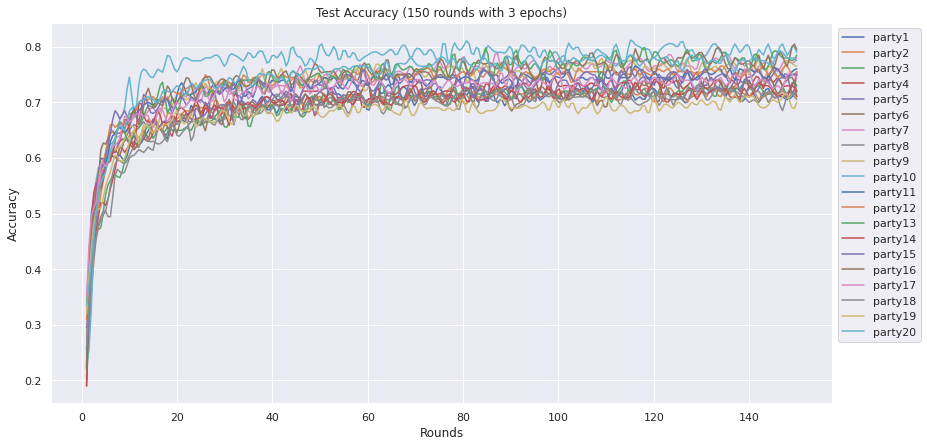

In [6]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

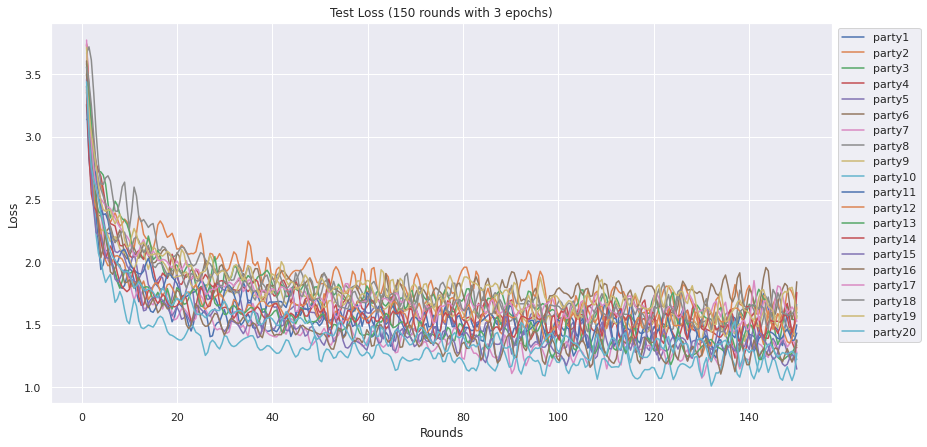

In [7]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

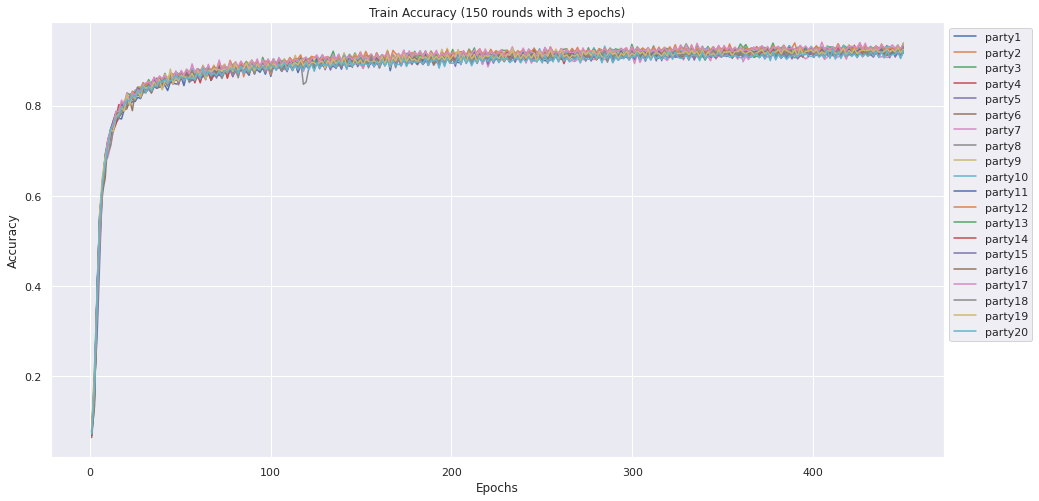

In [8]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

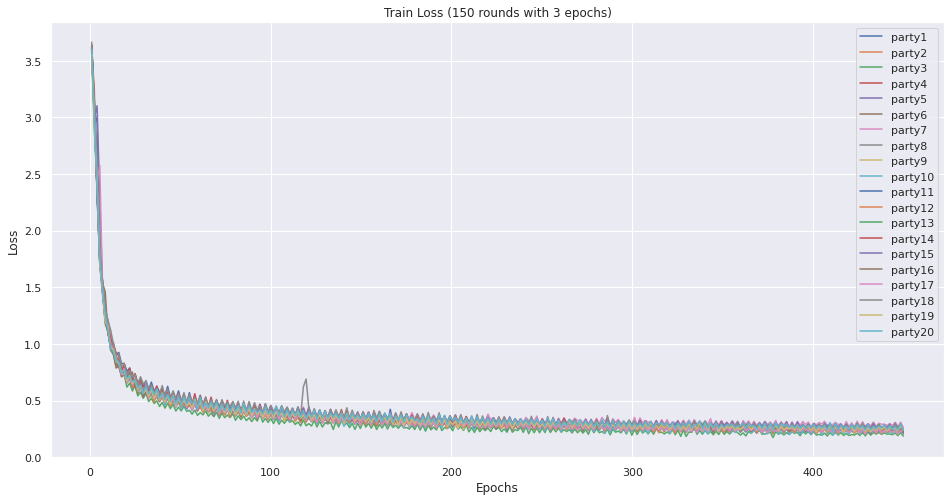

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [10]:
aggregator.model_synch()

2021-06-10T17:29:02.401Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-10T17:29:02.404Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7fab63eb9d68>
2021-06-10T17:29:02.405Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:29:03.784Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T17:29:03.784Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T17:29:03.785Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:29:03.786Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [11]:
aggregator.eval_model()

2021-06-10T17:29:03.791Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-10T17:29:03.792Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:29:05.105Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T17:29:05.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T17:29:05.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:29:05.107Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-10T17:29:05.107Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [12]:
aggregator.save_model()

2021-06-10T17:29:05.112Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-10T17:29:05.113Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-10T17:29:08.125Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-10T17:29:08.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-10T17:29:08.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-10T17:29:08.127Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-10T17:29:08.127Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
